<a href="https://colab.research.google.com/github/fjadidi2001/Image_Inpaint/blob/main/BIDS_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bidirectional Interaction Dual-Stream Network (BIDS-Net)

> The article proposes a novel approach for image inpainting called the Bidirectional Interaction Dual-Stream Network (BIDS-Net), integrating CNN and Transformer models to enhance inpainting quality by leveraging their complementary strengths.

## Methodology Overview
1. Dual-Stream Structure:

- CNN Stream: Captures rich local patterns and refines details.
- Transformer Stream: Models long-range contextual correlations for global information.
- Both streams are based on a U-shaped encoder-decoder structure to facilitate efficient multi-scale context reasoning.

2. Bidirectional Feature Interaction (BFI):

Implements **bidirectional feature alignment and fusion** between the CNN and Transformer streams.
Employs **Selective Feature Fusion (SFF)** for adaptive feature integration by learning channel weights.

3. Fast Global Self-Attention:

Utilizes a **kernelizable fast-attention mechanism** for the Transformer, reducing computational complexity to linear.

4. Loss Functions:

Combines pixel-wise reconstruction, adversarial, perceptual, and style losses to ensure inpainting quality and perceptual consistency.

- Channel allocation: Optimal performance when CNN and Transformer streams have equal importance.
- Fusion methods: Bidirectional fusion outperforms unidirectional and unified-path approaches.
- Specific fusion techniques: SFF surpasses element-wise addition and concatenation.
- Number of random features: Optimal trade-off achieved with 72 orthogonal random features.

### **Mask Creation Process**

#### 1. **Purpose of Masking in Image Inpainting**
   - Masks simulate corrupted regions by marking areas of an image for restoration.
   - Masks represent regions with **value 1** (corrupted) and **value 0** (uncorrupted), facilitating selective processing during training.

#### 2. **Mask Datasets**
   - **Mask Set I**: Contains irregular shapes with various hole-to-image area ratios (10%–60%) to simulate real-world image corruption scenarios.
   - **Mask Set II**: Focuses on **large-scale corruptions**, derived from a large mask sampling strategy, targeting challenges in **large-hole inpainting**.

#### 3. **Techniques for Mask Creation**
   - **Random Irregular Masks**:
     - Generated using freehand-like curves and random polygons.
     - Often involve **random rotations** and **flipping** for augmentation.
   - **Large-Hole Masks**:
     - Created by sampling large continuous regions, ensuring high diversity in shape and size.
   - **Tools and Libraries**:
     - Python libraries like **OpenCV** and **NumPy** for procedural generation of irregular shapes.
     - **External mask datasets** for additional diversity, e.g., Mask datasets from previous works such as [29].

---

### **Model Architecture: BIDS-Net**

#### 1. **Overall Structure**
   - A **dual-stream network** combining **CNN** and **Transformer** models in a parallel design.
   - Built on a **U-shaped encoder-decoder structure** for multi-scale feature extraction.

#### 2. **Key Components**
   - **CNN Stream**:
     - Focus: Capturing **local patterns** for texture refinement.
     - Built with **pre-activation residual blocks** for efficient and robust feature learning.
   - **Transformer Stream**:
     - Focus: Modeling **long-range contextual correlations**.
     - Uses **fast global self-attention** for scalability and reduced computational overhead.
   - **Bidirectional Feature Interaction (BFI)**:
     - Bridges the CNN and Transformer streams with **feature alignment** and **adaptive fusion**.

#### 3. **Detailed Implementation Steps**
   - **Input Projection**:
     - Corrupted images and masks are projected into separate feature spaces for the CNN and Transformer streams.
     - Transformer features are downsampled to balance computational cost and performance.
   - **Encoding Stage**:
     - Each stream extracts features using **convolutional blocks (CNN)** and **Transformer blocks**.
     - Features are fused bidirectionally via the **BFI module**.
   - **Bottleneck Stage**:
     - Features from both streams interact for enhanced context reasoning at the lowest spatial resolution.
   - **Decoding Stage**:
     - Outputs from both streams are upsampled and concatenated for final refinement.
   - **Output Projection**:
     - Combined features are transformed back to the image space for inpainting results.

---

### **Relevant Techniques and Algorithms**

#### 1. **Fast Global Self-Attention**
   - Reduces standard attention's quadratic complexity to linear using:
     - **Kernelizable Attention**: Positive orthogonal random features replace softmax attention.
     - Ensures **scalability** and efficiency for high-resolution images.

#### 2. **Selective Feature Fusion (SFF)**
   - Adapts weights for each channel during fusion, ensuring:
     - CNN benefits from Transformer’s global context.
     - Transformer incorporates CNN’s local details.
   - Based on the **Selective Kernel Convolution** technique.

#### 3. **Loss Functions**
   - **Pixel-wise Reconstruction Loss**: Ensures pixel-level consistency.
   - **Adversarial Loss**: Improves texture realism by incorporating a discriminator network.
   - **Perceptual Loss**: Derived from a pre-trained VGG-19, enhancing perceptual similarity.
   - **Style Loss**: Preserves stylistic details using Gram matrices.

---

### **Tools and Libraries**
   - **Frameworks**: PyTorch (1.10.1), TensorFlow for alternate implementations.
   - **Visualization**: Matplotlib or OpenCV for displaying masks and inpainted results.
   - **GPU Hardware**: Tested on NVIDIA GeForce RTX 3090 for performance.

---

### **Considerations**
   - **Mask Diversity**: Critical for generalization across various corruption scenarios.
   - **Computational Efficiency**: Striking a balance between accuracy and runtime, particularly with Transformer integration.
   - **Evaluation Metrics**:
     - Quantitative: PSNR, SSIM, FID, LPIPS.
     - Qualitative: Visual coherence and texture consistency.



## Dataset

In [1]:
!pip install datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
import os
import glob
import random
from PIL import Image
from datasets import Dataset, DatasetDict
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import cv2
from tqdm import tqdm
import wandb

In [3]:
model_name="caltech256-BIDS"

from google.colab import drive
drive.mount('/content/drive')

import os

CHECKPOINTS_DIR = '/content/drive/MyDrive/ckpts'

def save_checkpoint(model, optimizer, epoch):
    os.makedirs(CHECKPOINTS_DIR, exist_ok=True)
    checkpoint_path = f'{CHECKPOINTS_DIR}/{model_name}.pth'
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }, checkpoint_path)
    print(f"ckpt saved for {model_name} at epoch {epoch}.")

def load_checkpoint(model, optimizer):
    ckpt_path = f'{CHECKPOINTS_DIR}/{model_name}.pth'
    if not os.path.exists(ckpt_path):
        print(f"no ckpt found for {model_name} starting from epoch 0.")
        return 0

    checkpoint = torch.load(ckpt_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"ckpt loaded for {model_name} from {ckpt_path}. resuming from epoch {start_epoch}.")

    return start_epoch

Mounted at /content/drive


In [4]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("jessicali9530/caltech256")
print("Path to dataset files:", path)

100%|██████████| 2.12G/2.12G [00:56<00:00, 40.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jessicali9530/caltech256/versions/2


# Complete Image Inpainting Implementation



In [5]:
!pip install wandb

# 1. Constants and Configurations


In [16]:
CONFIG = {
    'BATCH_SIZE': 4,
    'EPOCHS': 10,
    'LEARNING_RATE': 0.001,
    'IMAGE_SIZE': 256,
    'TRAIN_SPLIT': 0.8,
    'checkpoint_dir': 'checkpoints',
    'results_dir': 'results',
    'accumulation_steps': 4,  # New parameter for gradient accumulation
    'SAVE_INTERVAL': 5
}


# 2. Dataset and Mask Generation

In [7]:
class Caltech256Dataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        # self.image_size = image_size
        self.image_paths = glob.glob(os.path.join(root_dir, "**/*.jpg"), recursive=True)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        mask = generate_random_mask(image.shape[1], image.shape[2])
        mask = torch.from_numpy(mask).float()

        return image, mask

def generate_random_mask(height, width):
    if random.random() > 0.5:
        return generate_irregular_mask(height, width)
    return generate_large_hole_mask(height, width)

def generate_irregular_mask(height, width, max_vertices=12, max_brush_width=50):
    mask = np.zeros((height, width), dtype=np.uint8)
    num_vertices = random.randint(3, max_vertices)
    vertices = np.array([[
        random.randint(0, width),
        random.randint(0, height)
    ] for _ in range(num_vertices)], dtype=np.int32)
    cv2.fillPoly(mask, [vertices], 1)

    for _ in range(random.randint(1, 5)):
        start_point = (random.randint(0, width), random.randint(0, height))
        end_point = (random.randint(0, width), random.randint(0, height))
        thickness = random.randint(10, max_brush_width)
        cv2.line(mask, start_point, end_point, 1, thickness)

    return mask

def generate_large_hole_mask(height, width, min_size=0.3, max_size=0.6):
    mask = np.zeros((height, width), dtype=np.uint8)
    hole_size = random.uniform(min_size, max_size)
    hole_height = int(height * hole_size)
    hole_width = int(width * hole_size)

    x = random.randint(0, width - hole_width)
    y = random.randint(0, height - hole_height)
    cv2.rectangle(mask, (x, y), (x + hole_width, y + hole_height), 1, -1)

    return mask


In [8]:
# 3. Model Architecture
class PreActResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(PreActResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.norm1 = nn.BatchNorm2d(in_channels)
        self.norm2 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

        # Skip connection for channel dimension mismatch
        self.skip = nn.Conv2d(in_channels, out_channels, kernel_size=1) if in_channels != out_channels else nn.Identity()

    def forward(self, x):
        identity = self.skip(x)

        out = self.norm1(x)
        out = self.relu(out)
        out = self.conv1(out)

        out = self.norm2(out)
        out = self.relu(out)
        out = self.conv2(out)

        return out + identity

class FastGlobalSelfAttention(nn.Module):
    def __init__(self, dim, num_heads):
        super(FastGlobalSelfAttention, self).__init__()
        self.num_heads = num_heads
        self.scale = (dim // num_heads) ** -0.5
        self.to_qkv = nn.Linear(dim, dim * 3)
        self.to_out = nn.Linear(dim, dim)

    def forward(self, x):
        B, C, H, W = x.shape
        x = x.flatten(2).transpose(1, 2)  # (B, H*W, C)

        qkv = self.to_qkv(x).chunk(3, dim=-1)
        q, k, v = map(lambda t: t.view(B, -1, self.num_heads, C // self.num_heads).transpose(1, 2), qkv)

        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)

        out = (attn @ v).transpose(1, 2).reshape(B, H * W, C)
        out = self.to_out(out)
        out = out.transpose(1, 2).view(B, C, H, W)

        return out

class BFI(nn.Module):
    def __init__(self, channels):
        super(BFI, self).__init__()
        self.cnn_norm = nn.BatchNorm2d(channels)
        self.trans_norm = nn.BatchNorm2d(channels)
        self.fusion = nn.Conv2d(channels * 2, channels, kernel_size=1)

    def forward(self, cnn_feat, trans_feat):
        cnn_feat = self.cnn_norm(cnn_feat)
        trans_feat = self.trans_norm(trans_feat)
        fused = torch.cat([cnn_feat, trans_feat], dim=1)
        return self.fusion(fused)

class BIDS_Net(nn.Module):
    def __init__(self, in_channels=3, out_channels=3, num_heads=8):
        super(BIDS_Net, self).__init__()

        # CNN Stream
        self.cnn_stream = nn.ModuleList([
            PreActResidualBlock(in_channels, 64),
            PreActResidualBlock(64, 128),
            PreActResidualBlock(128, 256)
        ])

        # Transformer Stream
        self.trans_proj = nn.Conv2d(in_channels, 64, kernel_size=1)
        self.trans_stream = nn.ModuleList([
            FastGlobalSelfAttention(64, num_heads),
            FastGlobalSelfAttention(128, num_heads),
            FastGlobalSelfAttention(256, num_heads)
        ])

        # Channel Adjustments for Transformer Stream
        self.trans_ch_adj = nn.ModuleList([
            nn.Conv2d(64, 128, kernel_size=1),
            nn.Conv2d(128, 256, kernel_size=1)
        ])

        # BFI Modules
        self.bfi1 = BFI(64)
        self.bfi2 = BFI(128)
        self.bfi3 = BFI(256)

        # Output Projection
        self.output = nn.Sequential(
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, out_channels, kernel_size=1)
        )

    def forward(self, x, mask):
        # CNN Stream
        cnn_feat1 = self.cnn_stream[0](x)
        cnn_feat2 = self.cnn_stream[1](cnn_feat1)
        cnn_feat3 = self.cnn_stream[2](cnn_feat2)

        # Transformer Stream
        trans_feat = self.trans_proj(x)
        trans_feat1 = self.trans_stream[0](trans_feat)

        trans_feat = self.trans_ch_adj[0](trans_feat1)
        trans_feat2 = self.trans_stream[1](trans_feat)

        trans_feat = self.trans_ch_adj[1](trans_feat2)
        trans_feat3 = self.trans_stream[2](trans_feat)

        # BFI Fusion
        fused1 = self.bfi1(cnn_feat1, trans_feat1)
        fused2 = self.bfi2(cnn_feat2, trans_feat2)
        fused3 = self.bfi3(cnn_feat3, trans_feat3)

        # Output
        out = self.output(fused3)
        return out * mask + x * (1 - mask)

In [9]:
# 4. Training and Evaluation Functions
def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    pbar = tqdm(dataloader, desc='Training')

    for images, masks in pbar:
        images = images.to(device)
        masks = masks.to(device)

        masked_images = images * (1 - masks.unsqueeze(1))

        optimizer.zero_grad()
        outputs = model(masked_images, masks.unsqueeze(1))
        loss = criterion(outputs, images)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        pbar.set_postfix({'loss': loss.item()})

    return total_loss / len(dataloader)

def validate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for images, masks in dataloader:
            images = images.to(device)
            masks = masks.to(device)

            masked_images = images * (1 - masks.unsqueeze(1))
            outputs = model(masked_images, masks.unsqueeze(1))
            loss = criterion(outputs, images)

            total_loss += loss.item()

    return total_loss / len(dataloader)

In [10]:
# 5. Checkpoint Functions
def save_checkpoint(model, optimizer, epoch, best_loss, path):
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_loss': best_loss
    }, path)

def load_checkpoint(model, optimizer, path):
    if not os.path.exists(path):
        return 0, float('inf')

    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    return checkpoint['epoch'] + 1, checkpoint['best_loss']

In [11]:
# 6. Visualization Functions
def visualize_results(model, dataloader, device, save_path=None):
    model.eval()
    denorm = transforms.Normalize(
        mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
        std=[1/0.229, 1/0.224, 1/0.225]
    )

    with torch.no_grad():
        images, masks = next(iter(dataloader))
        images = images[:5].to(device)  # Take first 5 samples
        masks = masks[:5].to(device)

        masked_images = images * (1 - masks.unsqueeze(1))
        outputs = model(masked_images, masks.unsqueeze(1))

        # Denormalize images
        images = denorm(images).cpu()
        masked_images = denorm(masked_images).cpu()
        outputs = denorm(outputs).cpu()

        # Create visualization
        fig, axes = plt.subplots(5, 3, figsize=(12, 20))

        for i in range(5):
            axes[i, 0].imshow(images[i].permute(1, 2, 0).clip(0, 1))
            axes[i, 0].set_title('Original')
            axes[i, 1].imshow(masked_images[i].permute(1, 2, 0).clip(0, 1))
            axes[i, 1].set_title('Masked')
            axes[i, 2].imshow(outputs[i].permute(1, 2, 0).clip(0, 1))
            axes[i, 2].set_title('Inpainted')

            for ax in axes[i]:
                ax.axis('off')

        plt.tight_layout()

        if save_path:
            plt.savefig(save_path)
            plt.close()
        else:
            plt.show()


In [12]:
path = kagglehub.dataset_download("jessicali9530/caltech256")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/jessicali9530/caltech256/versions/2


In [15]:
print(path)

/root/.cache/kagglehub/datasets/jessicali9530/caltech256/versions/2


In [14]:
def main():
    # Memory optimization settings
    torch.cuda.empty_cache()  # Clear cache before starting
    os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

    # Initialize wandb with lower log frequency
    wandb.init(project="image-inpainting",
               name="BIDS-Net-training",
               config=config)

    # Data transforms with smaller image size
    transform = transforms.Compose([
        transforms.Resize((config['image_size'], config['image_size'])),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                           std=[0.229, 0.224, 0.225])
    ])

    # Create datasets and dataloaders with memory-efficient settings
    dataset = Caltech256Dataset(
        root_dir="/root/.cache/kagglehub/datasets/jessicali9530/caltech256/versions/2",
        transform=transform,
        image_size=config['image_size']
    )

    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(
        train_dataset,
        batch_size=config['batch_size'],
        shuffle=True,
        num_workers=config['num_workers'],
        pin_memory=False,  # Disabled pin_memory to reduce memory usage
        persistent_workers=True  # Keep workers alive between batches
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=config['batch_size'],
        shuffle=False,
        num_workers=config['num_workers'],
        pin_memory=False,
        persistent_workers=True
    )

    # Initialize model with memory optimizations
    model = BIDS_Net().to(device)
    if torch.cuda.device_count() > 1:
        model = nn.DataParallel(model)

    optimizer = optim.Adam(model.parameters(), lr=config['learning_rate'])
    criterion = nn.L1Loss()
    scaler = torch.cuda.amp.GradScaler()  # For mixed precision training

    # Modified training loop with memory optimizations
    for epoch in range(config['epochs']):
        model.train()
        running_loss = 0.0
        optimizer.zero_grad()

        for i, (images, masks) in enumerate(train_loader):
            images = images.to(device)
            masks = masks.to(device)

            # Mixed precision training
            with torch.cuda.amp.autocast():
                masked_images = images * (1 - masks.unsqueeze(1))
                outputs = model(masked_images, masks.unsqueeze(1))
                loss = criterion(outputs, images)
                loss = loss / config['accumulation_steps']  # Normalize loss

            # Gradient accumulation
            scaler.scale(loss).backward()

            if (i + 1) % config['accumulation_steps'] == 0:
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()

            running_loss += loss.item() * config['accumulation_steps']

            # Clear cache periodically
            if i % 10 == 0:
                torch.cuda.empty_cache()

            # Log less frequently
            if i % 100 == 0:
                print(f'Epoch [{epoch+1}/{config["epochs"]}], '
                      f'Step [{i+1}/{len(train_loader)}], '
                      f'Loss: {running_loss/(i+1):.4f}')

        # Validation with memory optimization
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, masks in val_loader:
                images = images.to(device)
                masks = masks.to(device)

                with torch.cuda.amp.autocast():
                    masked_images = images * (1 - masks.unsqueeze(1))
                    outputs = model(masked_images, masks.unsqueeze(1))
                    loss = criterion(outputs, images)

                val_loss += loss.item()

                # Clear cache periodically
                torch.cuda.empty_cache()

        val_loss /= len(val_loader)

        # Save checkpoint with reduced frequency
        if (epoch + 1) % 5 == 0:
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': running_loss / len(train_loader),
            }, f'{config["checkpoint_dir"]}/checkpoint_epoch_{epoch+1}.pth')

        # Visualize results less frequently
        if (epoch + 1) % 10 == 0:  # Changed from 5 to 10
            visualize_results(model, val_loader, device, epoch, config['results_dir'])

if __name__ == "__main__":
    main()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


TypeError: Caltech256Dataset.__init__() got an unexpected keyword argument 'image_size'

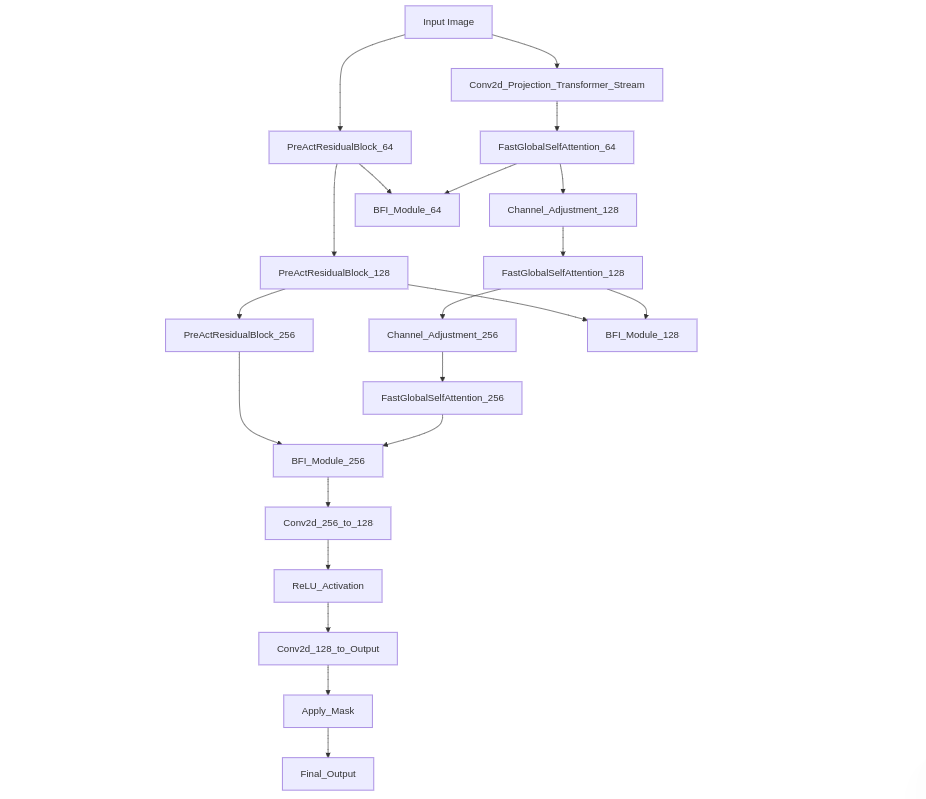